# Lab 1 Samuel Bieberich

## Section 1.a

Digital filters are broadly classified into FIR and IIR filters. Give an
example of an FIR filter and IIR filter (transfer function). Plot the transfer
function in Python. Identify the poles and zeros on the plot.

In [23]:
#imports cell 

#may need to install scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


An example of an FIR filer (Finite Impulse Response) would be as below:

$$
H(z) = 1 + 2z^{-1} + 5z^{-2} + 4z^{-3} + z^{-4}
$$

In [24]:
#The FIR filter example I chose (arbitrary numbers) is as follows:

b = [1, 2, 5, 4, 1]
a = [1]

w, h = signal.freqz(b, a)

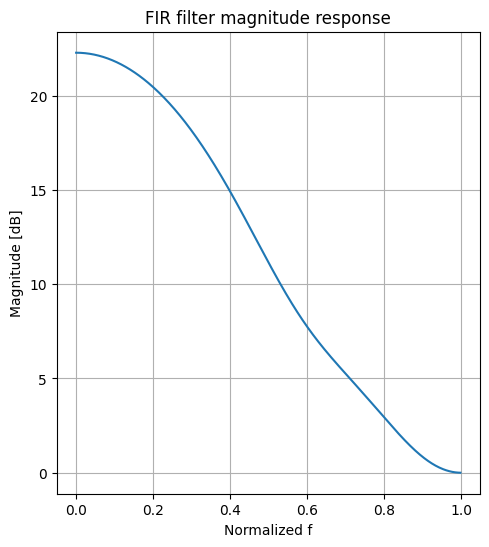

In [25]:
#plotting the filter response

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(w/np.pi, 20 * np.log10(np.abs(h)))
plt.title('FIR filter magnitude response')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Normalized f')
plt.grid(True)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


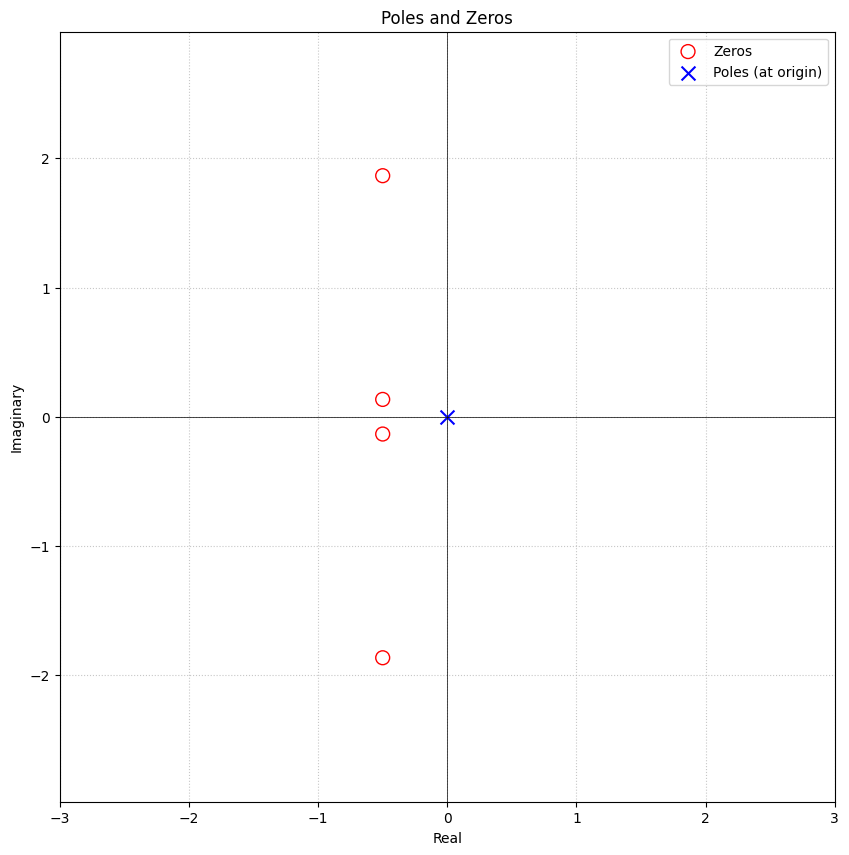

Zeros:
  Zero 1: Real = -0.500, Imaginary = 1.866
  Zero 2: Real = -0.500, Imaginary = -1.866
  Zero 3: Real = -0.500, Imaginary = 0.134
  Zero 4: Real = -0.500, Imaginary = -0.134
Poles:
There is one pole at (0,0) so it is not recorded in the array


In [26]:
#plotting the poles and zeros

# Calculate zeros and poles
zeros, poles, _ = signal.tf2zpk(b, a)

plt.figure(figsize=(10, 10))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='r', s=100, label='Zeros')

plt.scatter([0], [0], marker='x', color='b', s=100, label='Poles (at origin)') #functe otherwise the poles would not show on the origin explicitly 

plt.title('Poles and Zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

# Print the coordinates of zeros
print("Zeros:")
for i, z in enumerate(zeros):
    print(f"  Zero {i+1}: Real = {np.real(z):.3f}, Imaginary = {np.imag(z):.3f}")

# Print the coordinates of poles
print("Poles:")
for i, p in enumerate(poles):
    print(f"  Pole {i+1}: Real = {np.real(p):.3f}, Imaginary = {np.imag(p):.3f}")
print("There is one pole at (0,0) so it is not recorded in the array")

An example of an IIR filter (Infinite Impulse Response) would be as below:

$H(z) = \frac{1.0}{1 + 0.20788z^{-1}}$

from Akash Murphy

In [27]:
b = [1.0]  
a = [1.0, 0.26795]  

w, h = signal.freqz(b, a)

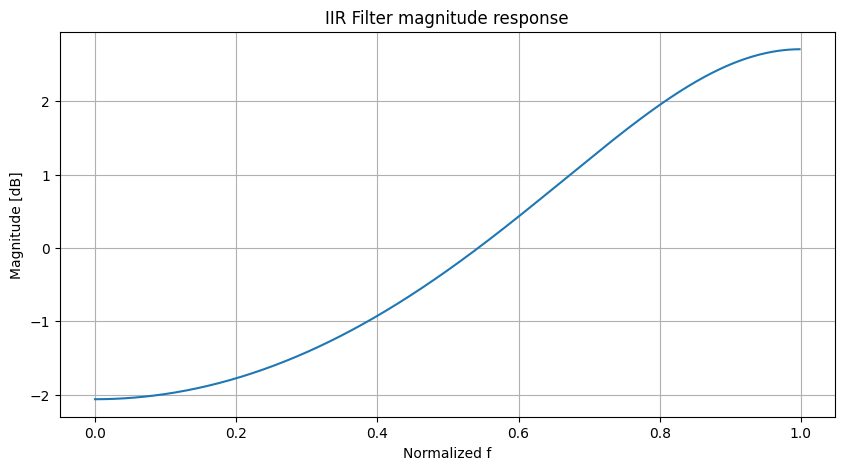

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(w / np.pi, 20 * np.log10(np.abs(h)))
plt.title('IIR Filter magnitude response')
plt.xlabel('Normalized f')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


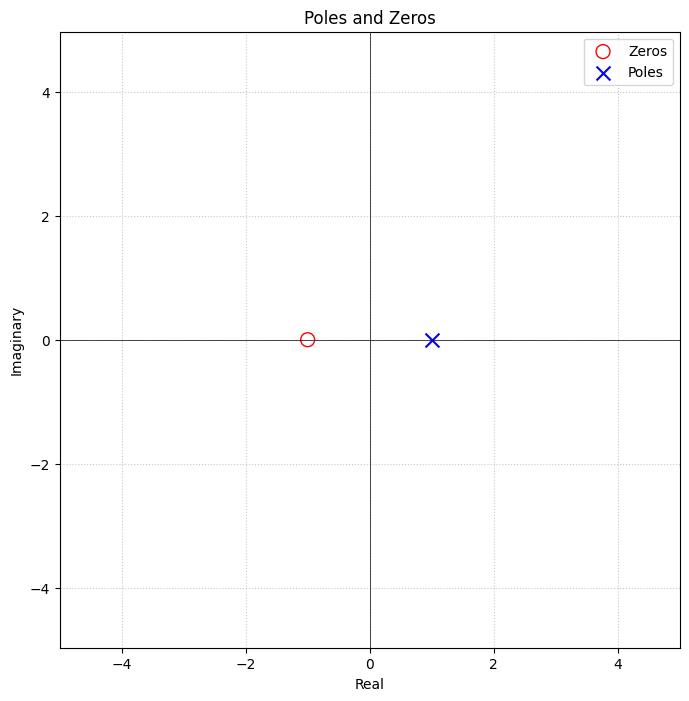

In [37]:
#plotting the poles and zeroes

zeros, poles, _ = signal.tf2zpk(b, a)

plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='r', s=100, label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='b', s=100, label='Poles')

plt.title('Poles and Zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

## Section 1.b

Identify the FIR and IIR filter. Plot the FIR filter in (use freqz function in
the SciPy signal processing toolbox). Where are the poles and zeros of the
filter located? Validate your theory using simulations.

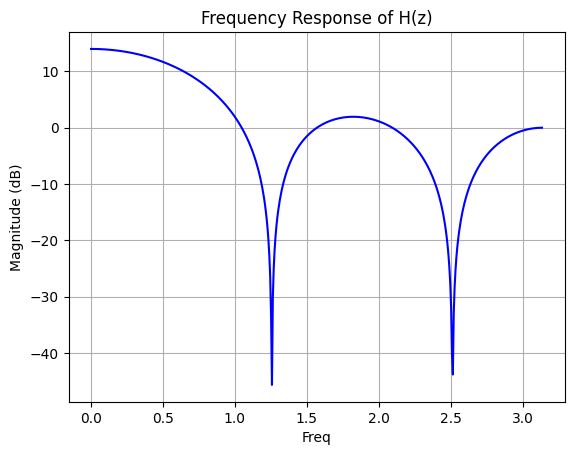

In [30]:
#modeling the FIR filter with freqz from scipy

b = [1, 1, 1, 1, 1]  #coefficients of H
a = 1 

w, H = signal.freqz(b, a)

plt.figure()
plt.title('Frequency Response of H(z)')
plt.plot(w, 20 * np.log10(abs(H)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Freq')
plt.grid(True)
plt.show()

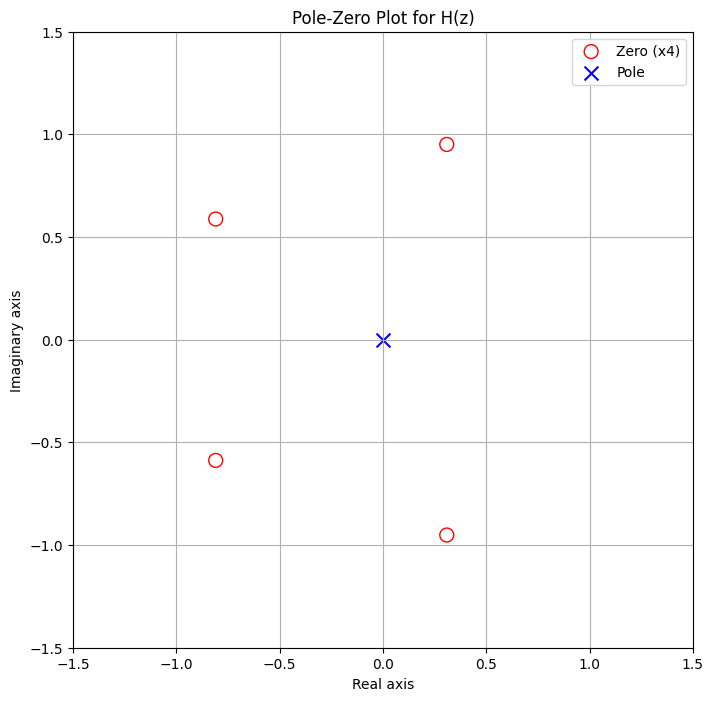

In [31]:
#showing the poles and zeroes

zeros = np.roots(b)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(zeros.real, zeros.imag, marker='o', facecolors='none', edgecolors='r', s=100, label='Zero (x4)')

ax.scatter(0, 0, marker='x', color='b', s=100, label='Pole')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_title('Pole-Zero Plot for H(z)')
ax.grid(True)
ax.legend()

plt.show()


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


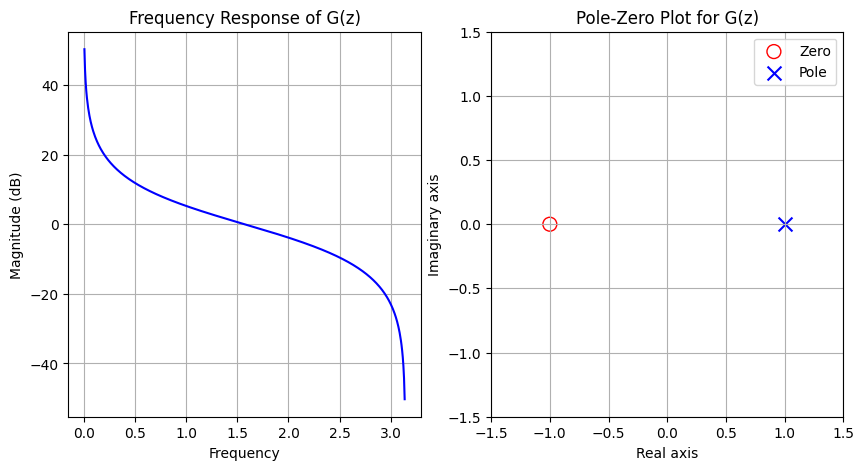

In [32]:
#same for the iir filter (renamed to G)

b = [1, 1]  
a = [1, -1]  

w, h = signal.freqz(b, a)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Frequency Response of G(z)')
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency')
plt.grid(True)

zeros = np.roots(b)
poles = np.roots(a)

plt.subplot(122)
plt.title('Pole-Zero Plot for G(z)')
plt.scatter(zeros.real, zeros.imag, marker='o', facecolors='none', edgecolors='r', s=100, label='Zero')
plt.scatter(poles.real, poles.imag, marker='x', color='b', s=100, label='Pole')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.grid(True)
plt.legend()

plt.show()

## Section 1.c

Comment on the stability of the FIR and IIR filters. Use simple simulations
to explain your ideas.

The FIR filter is stable, by definition.

The IIR filter is also stable, because the poles are inside of the unit circle. 

------------------------------

## Section 2.a

Consider the two signals $x_1(t) = \cos(2\pi\cdot F_1 \cdot t)$ and $x_2(t) = \cos(2\pi\cdot F_2 \cdot t)$, where $F_1 = 300\text{MHz}$ and $F_2 = 800\text{MHz}$. Both these signals are sampled at the same sampling frequency $F_s = 500\text{MHz}$. What can you say about the sampled data $x_1(n)$ and $x_2(n)$? Explain with simulations why this happens.

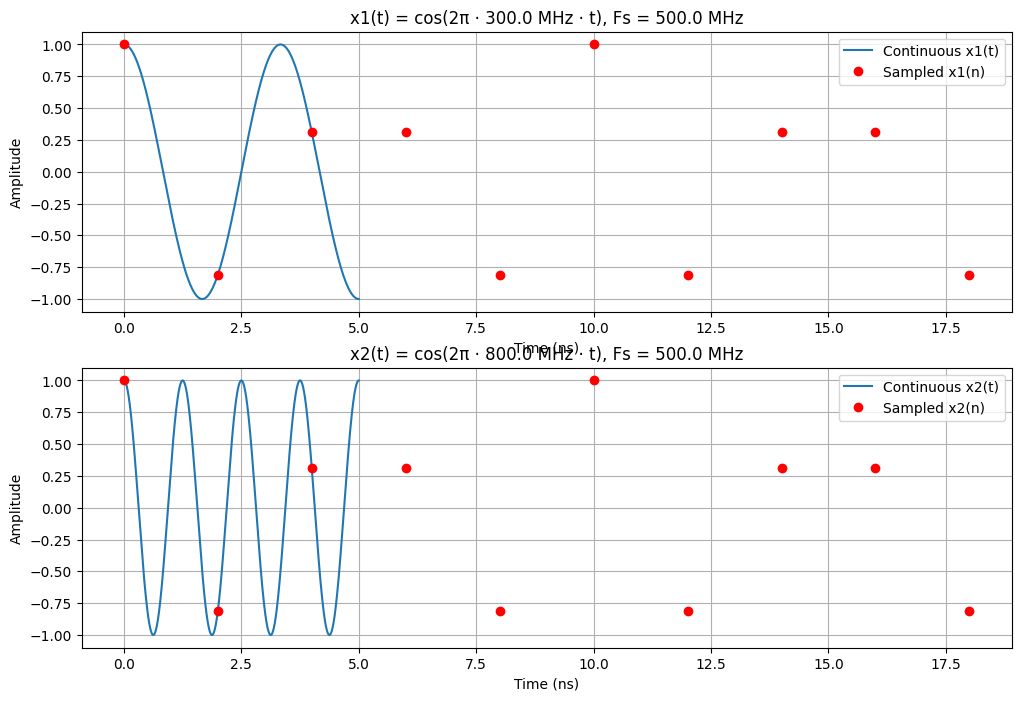

In [33]:
F1 = 300e6 
F2 = 800e6 
Fs = 500e6  

t = np.linspace(0, 5e-9, 1000)  # 5 ns, 1000 points

x1 = np.cos(2 * np.pi * F1 * t)
x2 = np.cos(2 * np.pi * F2 * t)

n = np.arange(0, 10)  
ts = n / Fs

x1s = np.cos(2 * np.pi * F1 * ts)
x2s = np.cos(2 * np.pi * F2 * ts)

plt.figure(figsize=(12, 8))

#x1 plot
plt.subplot(2, 1, 1)
plt.plot(t*1e9, x1, label='Continuous x1(t)')
plt.plot(ts*1e9, x1s, 'ro', label='Sampled x1(n)')
plt.title(f'x1(t) = cos(2π · {F1/1e6} MHz · t), Fs = {Fs/1e6} MHz')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

#x2 plot
plt.subplot(2, 1, 2)
plt.plot(t*1e9, x2, label='Continuous x2(t)')
plt.plot(ts*1e9, x2s, 'ro', label='Sampled x2(n)')
plt.title(f'x2(t) = cos(2π · {F2/1e6} MHz · t), Fs = {Fs/1e6} MHz')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.show()

x1(n) and x2(n) are both aliased to 200 MHz (from $F_a = |F - k * Fs|$)

Hence, the plot below depicts the relationship between the two plots and the aliased result

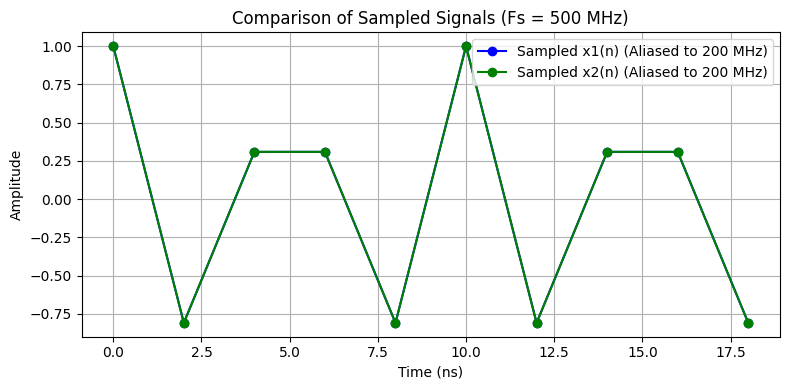

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  
plt.plot(ts * 1e9, x1s, 'bo-', label='Sampled x1(n) (Aliased to 200 MHz)')
plt.plot(ts * 1e9, x2s, 'go-', label='Sampled x2(n) (Aliased to 200 MHz)')
plt.title('Comparison of Sampled Signals (Fs = 500 MHz)')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Note that the two lines are directly on top of one another above!

## Section 2.b

Can you recover the signals $x_1(t)$ and $x_2(t)$ from $x_1(n)$ and $x_2(n)$. If not, what is your suggestion to overcome this problem?

No, it is not possible to recover x1(t) and x2(t) from x1(n) and x2(n) due to aliasing. The irreversible quality of aliasing makes recovery of the data lost impossible.

To prevent this, the best approach is to increase the sampling frequency to >= 1600 MHz to ensure that it is equal to or greater than the maximum frequency being analyzed.  Alternatively, an anti-aliasing filter with a cutoff frequency below 250 MHz could be used before sampling.

## Section 2.c

Find the ideal signal reconstruction (interpolation) equation for a zero-order hold sampling system with pulse width $W$ and sampling rate $T$. Assume that Nyquist rate criteria is satisfied and the sampling point is at the end of the pulse width.

The ideal method 

$$
x_r(t) = \sum_{n=-\infty}^{\infty} x[n] \cdot p(t - nT)
$$

Therefore, the reconstructed signal can be expressed as:

$$
x_r(t) = \begin{cases}
    x[n], & \text{for } nT - W \leq t < nT \\
    0, & \text{otherwise}
\end{cases}
$$


This equation indicates that the reconstructed signal $x_r(t)$ is equal to the sampled value $x[n]$ during the interval from $nT - W$ to $nT$, and zero everywhere else. The reconstructed signal is a staircase of steps, held backwards in time.

Reference: https://eng.libretexts.org/Bookshelves/Industrial_and_Systems_Engineering/Introduction_to_Control_Systems_(Iqbal)/07%3A_Design_of_Sampled-Data_Systems/7.02%3A_Pulse_Transfer_Function

## Section 2.d

Sample the signal $x_1(t)$ using $F_s = 800\text{MHz}$ at $0:T_s:T-T_s$, where $T = 10/F_1$ (i.e. 10 cycles of the cosine wave) and $T_s = 1/F_s$. Reconstruct the signal from the samples using the formula

$x_r(t) = \sum_{n=-\infty}^{\infty} x(n) \frac{\sin[\pi(t-nT_s)/T_s]}{\pi(t-nT_s)/T_s}$

Now sample the signal at $T_s/2:T_s:T-T_s/2$ i.e. the samples are shifted by $T_s/2$. Reconstruct the signal using the same formula. Compute the error in the reconstruction in both the cases by the method of mean squares given by,

$
MSE = \text{mean}((x(t) - x_r(t))^2)
$

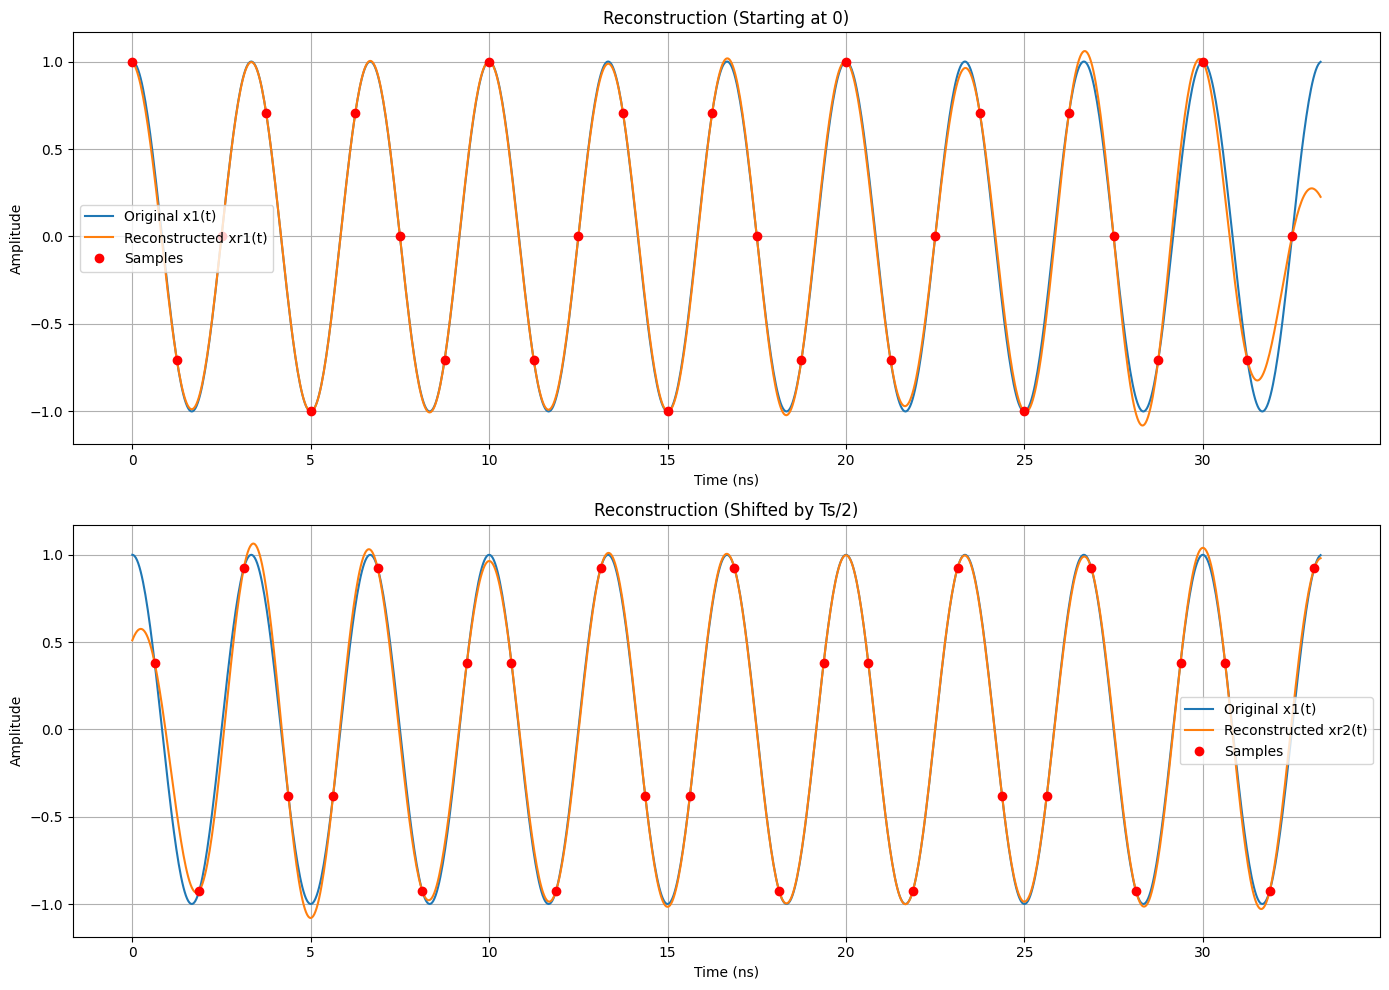

MSE (Case 1: Starting at 0): 0.008343914549490052
MSE (Case 2: Shifted by Ts/2): 0.0038532699091457395


In [35]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 800e6  
T = 10 / F1  
Ts = 1 / Fs  

t = np.linspace(0, T, 1000, endpoint=False) 
x1 = np.cos(2 * np.pi * F1 * t)

def funct(x):
    x = np.asarray(x)  
    result = np.zeros_like(x, dtype=float) 
    non_zero_indices = x != 0 #get rid of the nan values due to div by zero
    result[non_zero_indices] = np.sin(np.pi * x[non_zero_indices]) / (np.pi * x[non_zero_indices])
    result[x == 0] = 1.0  
    return result

#part 1
t_sampled1 = np.arange(0, T, Ts) 
x1_sampled1 = np.cos(2 * np.pi * F1 * t_sampled1)  

xr1 = np.zeros_like(t)
for n in range(len(x1_sampled1)):
    xr1 += x1_sampled1[n] * funct((t - t_sampled1[n]) / Ts)

#part 2
t_sampled2 = np.arange(Ts/2, T, Ts)
x1_sampled2 = np.cos(2 * np.pi * F1 * t_sampled2) 

xr2 = np.zeros_like(t)
for n in range(len(x1_sampled2)):
    xr2 += x1_sampled2[n] * funct((t - t_sampled2[n]) / Ts)

#plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(t * 1e9, x1, label='Original x1(t)')
plt.plot(t * 1e9, xr1, label='Reconstructed xr1(t)')
plt.plot(t_sampled1 * 1e9, x1_sampled1, 'ro', label='Samples')
plt.title('Reconstruction (Starting at 0)')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t * 1e9, x1, label='Original x1(t)')
plt.plot(t * 1e9, xr2, label='Reconstructed xr2(t)')
plt.plot(t_sampled2 * 1e9, x1_sampled2, 'ro', label='Samples')
plt.title('Reconstruction (Shifted by Ts/2)')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

MSE1 = np.mean((xr1 - x1)**2)
MSE2 = np.mean((xr2 - x1)**2)

print(f"MSE (Case 1: Starting at 0): {MSE1}")
print(f"MSE (Case 2: Shifted by Ts/2): {MSE2}")


## Section 2.e

Repeat d. for $F_s = 1000\text{MHz}$ and $F_s = 500\text{MHz}$. Report your observations.

Mean Square Error (MSE) for the different sampling frequencies:
MSE for Fs = 500.0 MHz: MSE1 = 0.9312334986093911, MSE2 = 0.9151890672713726
MSE for Fs = 800.0 MHz: MSE1 = 0.020359029008593165, MSE2 = 0.0075883682668947666
MSE for Fs = 1000.0 MHz: MSE1 = 0.012827166575828828, MSE2 = 0.004463721750142136


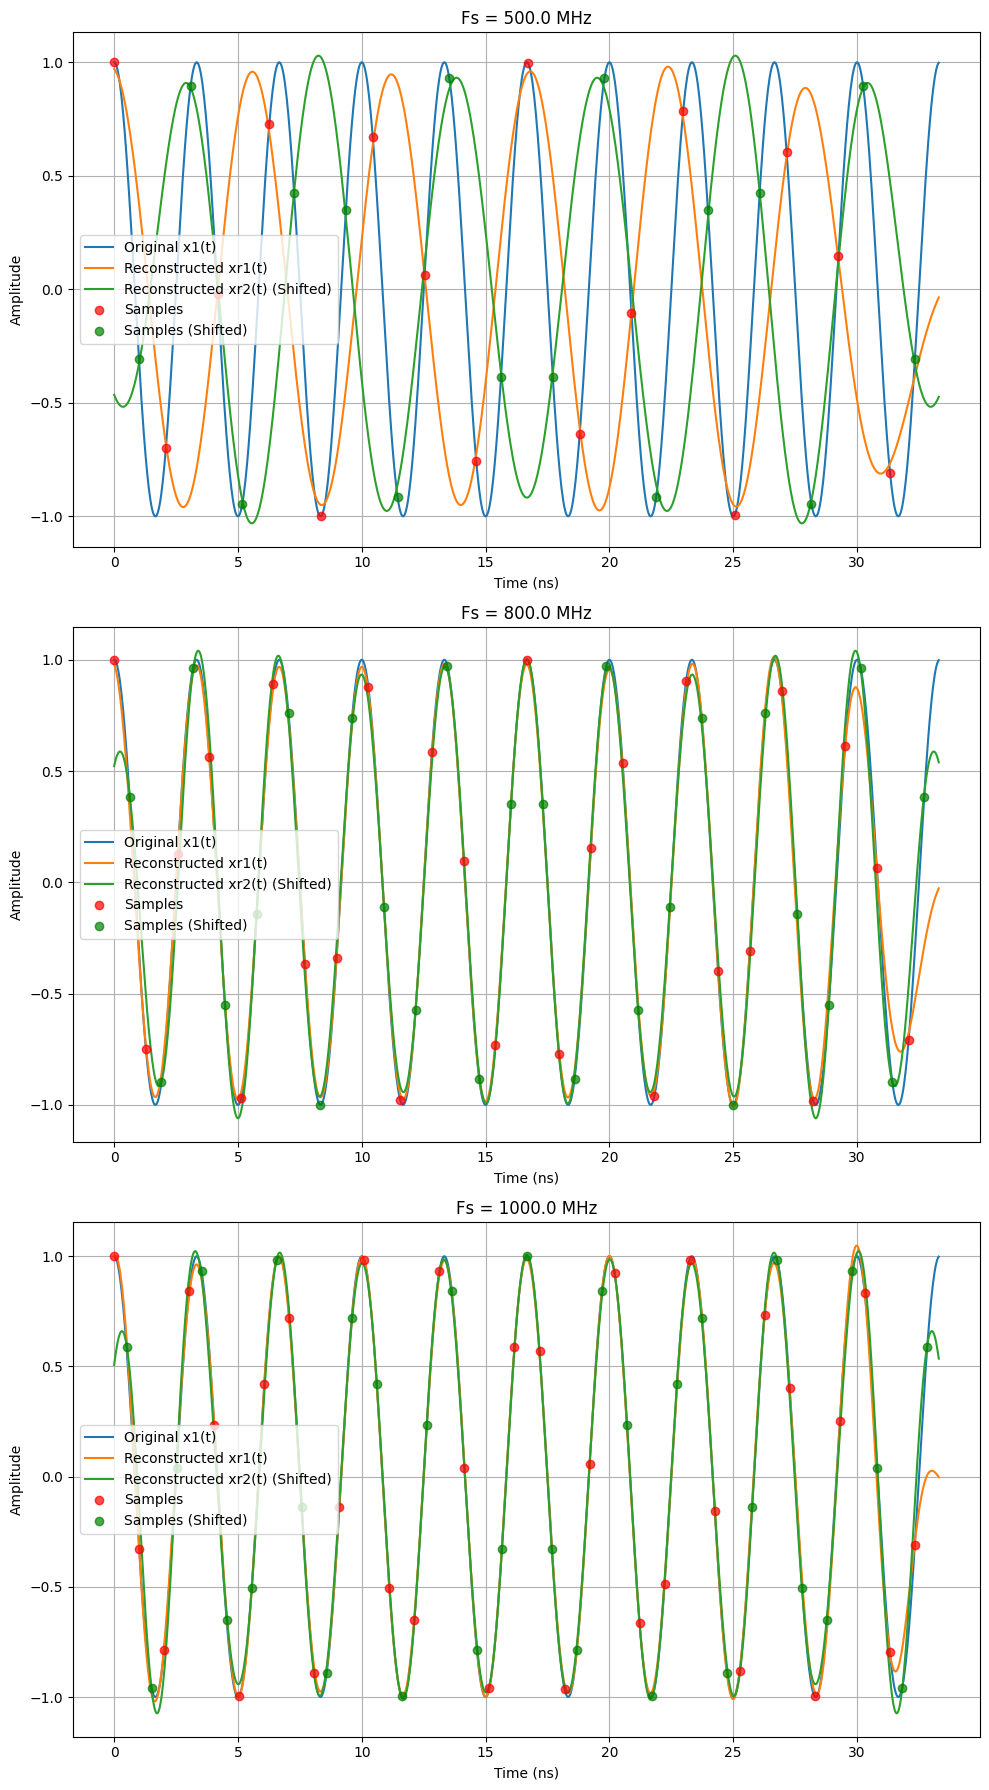

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_and_calculate_mse(Fs):
    
    T = 10 / F1 
    Ts = 1 / Fs 

    t = np.linspace(0, T, 1000, endpoint=False)
    x1 = np.cos(2 * np.pi * F1 * t)

    def funct(x):
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)
        non_zero_indices = x != 0
        result[non_zero_indices] = np.sin(np.pi * x[non_zero_indices]) / (np.pi * x[non_zero_indices])
        result[x == 0] = 1.0
        return result

    N = int(T / Ts)
    t_sampled1 = np.linspace(0, T - Ts, N)
    x1_sampled1 = np.cos(2 * np.pi * F1 * t_sampled1)

    xr1 = np.zeros_like(t)
    for n in range(len(x1_sampled1)):
        xr1 += x1_sampled1[n] * funct((t - t_sampled1[n]) / Ts)

    N = int(T / Ts)
    t_sampled2 = np.linspace(Ts/2, T - Ts/2, N)
    x1_sampled2 = np.cos(2 * np.pi * F1 * t_sampled2)

    xr2 = np.zeros_like(t)
    for n in range(len(x1_sampled2)):
        xr2 += x1_sampled2[n] * funct((t - t_sampled2[n]) / Ts)

    MSE1 = np.mean((xr1 - x1)**2)
    MSE2 = np.mean((xr2 - x1)**2)

    return MSE1, MSE2, t, x1, xr1, xr2, t_sampled1, t_sampled2, x1_sampled1, x1_sampled2


Fs_values = [500e6, 800e6, 1000e6]
results = {} #for printing to the plots

print("Mean Square Error (MSE) for the different sampling frequencies:")

for Fs in Fs_values:
    results[Fs] = reconstruct_and_calculate_mse(Fs)
    print(f"MSE for Fs = {Fs/1e6} MHz: MSE1 = {results[Fs][0]}, MSE2 = {results[Fs][1]}")

plt.figure(figsize=(10, 18))  

#iterate through the Fs values of 500 800 and 1000 Mhz
for i, Fs in enumerate(Fs_values):
    MSE1, MSE2, t, x1, xr1, xr2, t_sampled1, t_sampled2, x1_sampled1, x1_sampled2 = results[Fs]
    plt.subplot(3, 1, i + 1) 
    plt.plot(t * 1e9, x1, label='Original x1(t)')
    plt.plot(t * 1e9, xr1, label='Reconstructed xr1(t)')
    plt.plot(t * 1e9, xr2, label='Reconstructed xr2(t) (Shifted)')

    plt.plot(t_sampled1 * 1e9, x1_sampled1, 'ro', label='Samples', alpha=0.7)
    plt.plot(t_sampled2 * 1e9, x1_sampled2, 'go', label='Samples (Shifted)', alpha=0.7)

    plt.title(f'Fs = {Fs/1e6} MHz')
    plt.xlabel('Time (ns)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


-------------------------------

## Section 3.a

Consider the signal $x(t) = \cos(2\pi\cdot F\cdot t)$ where $F = 2\text{MHz}$. Sample the signal at $F_s = 5\text{MHz}$. Compute a 50 point DFT in Python and plot the output. (see fft command in SciPy documentation).

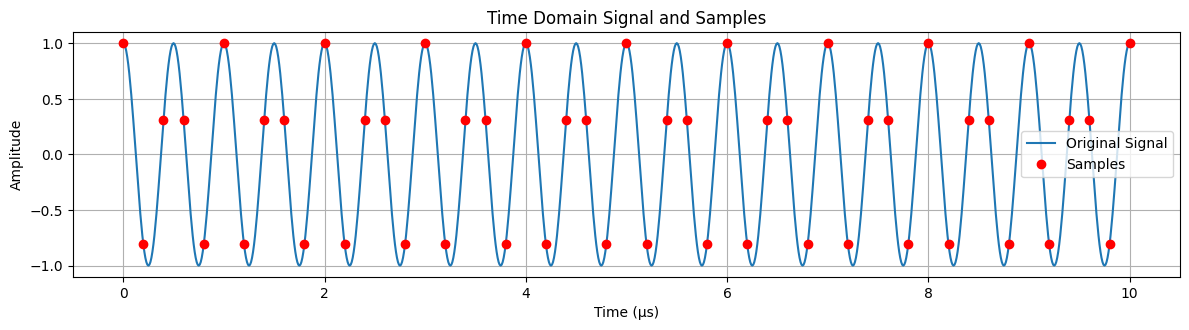

In [54]:
from scipy.fft import fft, fftfreq

F = 2e6  
Fs = 5e6 
N = 50  

T = N / Fs  
t = np.linspace(0, T, 1000, endpoint=False)  
x_continuous = np.cos(2 * np.pi * F * t) 

Ts = 1 / Fs 
t_sampled = np.arange(0, T, Ts)  
x_sampled = np.cos(2 * np.pi * F * t_sampled)  


X = fft(x_sampled, N)
frequencies = fftfreq(N, Ts)  

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t * 1e6, x_continuous, label='Original Signal')
plt.plot(t_sampled * 1e6, x_sampled, 'ro', label='Samples')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal and Samples")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Section 3.b

Consider another signal $y(t) = \cos(2\pi\cdot F_1 \cdot t) + \cos(2\pi\cdot F_2 \cdot t)$ where $F_1 = 200\text{MHz}$ and $F_2 = 400\text{MHz}$. Sample this signal at $F_s = 1\text{GHz}$. Compute and plot a 50 point DFT. Can you identify the two components of the signal in the plot?

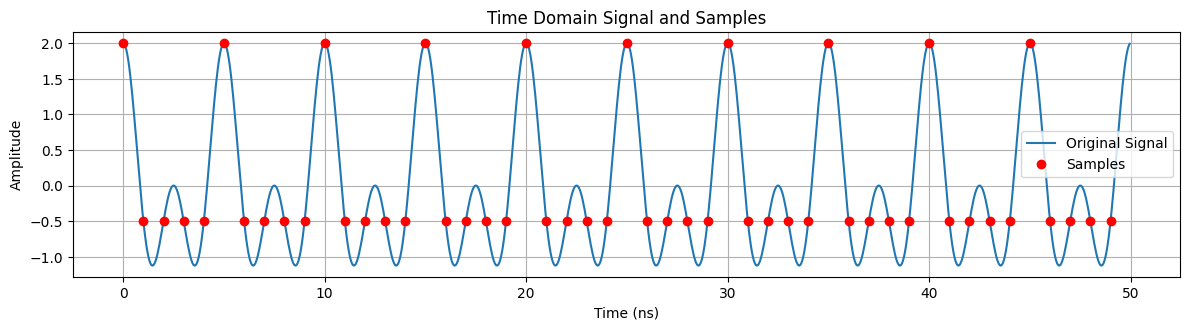

In [55]:
F1 = 200e6 
F2 = 400e6 
Fs = 1e9  
N = 50  

T = N / Fs 
t = np.linspace(0, T, 1000, endpoint=False) 
y_continuous = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t) 

Ts = 1 / Fs 
t_sampled = np.arange(0, T, Ts)  
y_sampled = np.cos(2 * np.pi * F1 * t_sampled) + np.cos(2 * np.pi * F2 * t_sampled)  

Y = fft(y_sampled, N)
frequencies = fftfreq(N, Ts)  

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t * 1e9, y_continuous, label='Original Signal')
plt.plot(t_sampled * 1e9, y_sampled, 'ro', label='Samples')
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal and Samples")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


With regards to determining the two components of the signal from the plot, it is hard to tell from just the sampled points, but with the original signal it is clear that there is one with a much greater amplitude that the other. 

## Section 3.c

Repeat b. using $F_s = 500\text{MHz}$. Explain what you observe in your DFT plot.

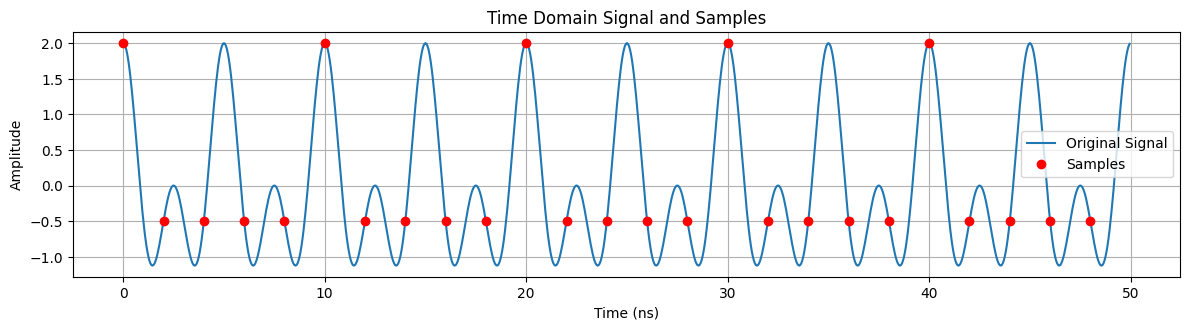

In [56]:
Fs = 500e6

Ts = 1 / Fs 
t_sampled = np.arange(0, T, Ts)  
y_sampled = np.cos(2 * np.pi * F1 * t_sampled) + np.cos(2 * np.pi * F2 * t_sampled)  

Y = fft(y_sampled, N)
frequencies = fftfreq(N, Ts)  

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t * 1e9, y_continuous, label='Original Signal')
plt.plot(t_sampled * 1e9, y_sampled, 'ro', label='Samples')
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal and Samples")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

This time the samples are even worse than before with regards to determining what the original signal was, since only every other greater amplitude is sampled, and the other samples are throughout the periods. 

## Section 3.d

Now apply a Blackman window as an envelope to the signal $x(t)$ and $y(t)$ and repeat the analysis. Please explain the differences.

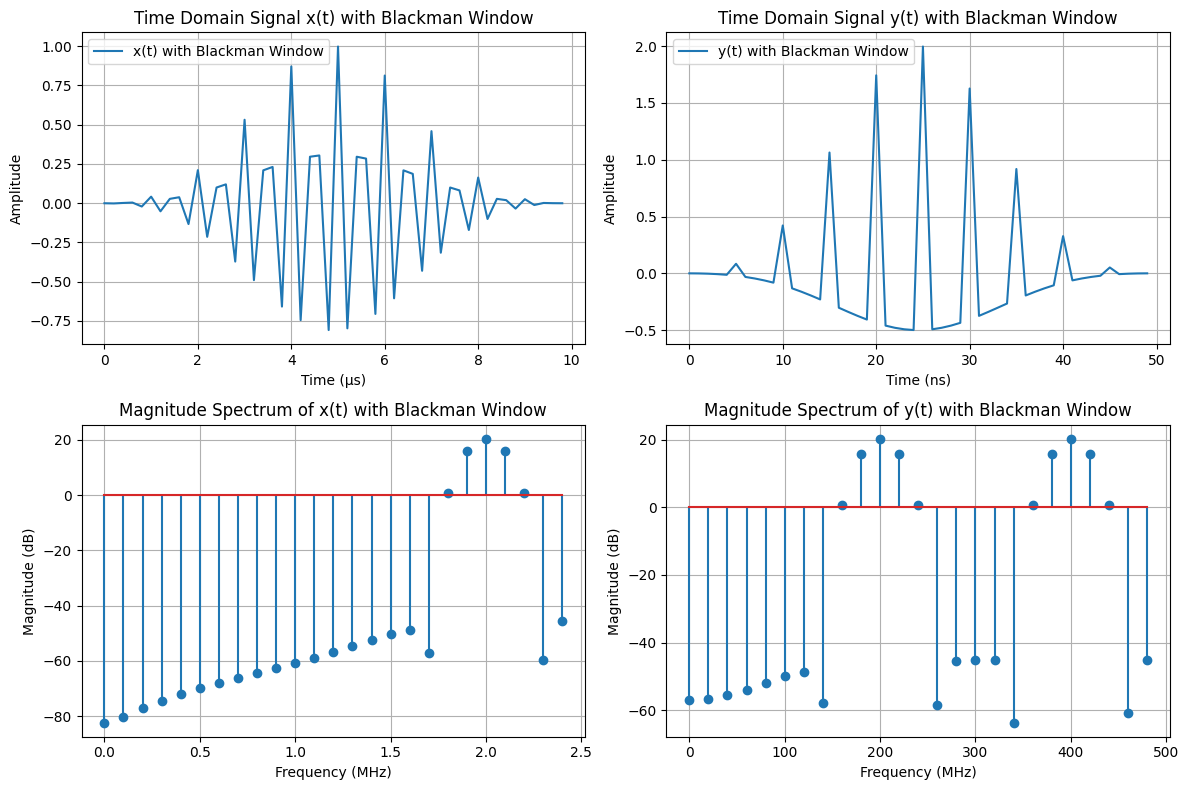

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Given parameters
F_x = 2e6  # Frequency of x(t) in Hz
F1_y = 200e6  # First frequency of y(t) in Hz
F2_y = 400e6  # Second frequency of y(t) in Hz
Fs_x = 5e6  # Sampling frequency for x(t) in Hz
Fs_y = 1e9  # Sampling frequency for y(t) in Hz
N = 50  # Number of points in DFT

# Time vectors
T_x = N / Fs_x  # Total signal duration for x(t)
T_y = N / Fs_y  # Total signal duration for y(t)
t_x = np.linspace(0, T_x, N, endpoint=False)
t_y = np.linspace(0, T_y, N, endpoint=False)

# Sampled signals
x_sampled = np.cos(2 * np.pi * F_x * t_x)
y_sampled = np.cos(2 * np.pi * F1_y * t_y) + np.cos(2 * np.pi * F2_y * t_y)

# Apply Blackman window
blackman_window_x = np.blackman(N)
blackman_window_y = np.blackman(N)
x_windowed = x_sampled * blackman_window_x
y_windowed = y_sampled * blackman_window_y

# Compute DFT using FFT
X = fft(x_windowed, N)
Y = fft(y_windowed, N)
frequencies_x = fftfreq(N, 1 / Fs_x)
frequencies_y = fftfreq(N, 1 / Fs_y)

# Convert magnitude to decibels
magnitude_db_x = 20 * np.log10(np.abs(X[:N//2]))
magnitude_db_y = 20 * np.log10(np.abs(Y[:N//2]))

# Plot time domain signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_x * 1e6, x_windowed, label='x(t) with Blackman Window')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal x(t) with Blackman Window")
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t_y * 1e9, y_windowed, label='y(t) with Blackman Window')
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal y(t) with Blackman Window")
plt.legend()
plt.grid()

# Plot frequency domain signals
plt.subplot(2, 2, 3)
plt.stem(frequencies_x[:N//2] / 1e6, magnitude_db_x)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.title("Magnitude Spectrum of x(t) with Blackman Window")
plt.grid()

plt.subplot(2, 2, 4)
plt.stem(frequencies_y[:N//2] / 1e6, magnitude_db_y)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.title("Magnitude Spectrum of y(t) with Blackman Window")
plt.grid()

plt.tight_layout()
plt.show()

